In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA


In [2]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\iris.csv"

In [3]:
# read the dataset
df = pd.read_csv(location)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# split data table into data X and class labels y

X_iris = df.iloc[:, 0:3].values 
y_iris = df.iloc[:,   4].values

In [8]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}


# Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Standardizing

In [7]:
# Whether to standardize the data prior to a PCA on the covariance matrix 
# depends on the measurement scales of the original features. 

# Since PCA yields a feature subspace that maximizes the variance along 
# the axes, it makes sense to standardize the data, 
# especially, if it was measured on different scales. 

# Although, all features in the Iris dataset were measured in centimeters, 
# let us continue with the transformation of the data onto unit scale 
# (mean=0 and variance=1), which is a requirement for the optimal 
# performance of many machine learning algorithms.

X_iris_std = StandardScaler().fit_transform(X_iris)

The eigenvectors and eigenvalues of a covariance (or correlation) matrix 
represent the “core” of a PCA

The eigenvectors (principal components) determine the directions of the 
new feature space, and the eigenvalues determine their magnitude. 

In other words, the __eigenvalues explain the variance__ of the data along 
the new feature axes.

In [8]:
# no of samples in the X array
len(X_iris_std)

150

In [9]:
# first 5 samples, all 3 columns
print(X_iris_std[:5])

[[-0.90068117  1.03205722 -1.3412724 ]
 [-1.14301691 -0.1249576  -1.3412724 ]
 [-1.38535265  0.33784833 -1.39813811]
 [-1.50652052  0.10644536 -1.2844067 ]
 [-1.02184904  1.26346019 -1.3412724 ]]


- compute the transpose matrix of X_std
- the transpose will result in matrix of  number of features x samples size

In this case, 150x3 matrix will transform into 3x150

In [10]:
X_iris_std_T = X_iris_std.T

In [11]:
X_iris_std_T.shape

(3, 150)

In [13]:
# eigendecomposition on the covariance matrix
cov_mat = np.cov(X_iris_std_T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486],
       [-0.11010327,  1.00671141, -0.42333835],
       [ 0.87760486, -0.42333835,  1.00671141]])

In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.63137983  0.64685642  0.42771052]
 [ 0.35424227 -0.25005463  0.90110216]
 [-0.6898347  -0.72045087  0.07126444]]

Eigenvalues 
[2.02734192 0.07182178 0.92097052]


#### Selecting Principal Components

In [15]:
# The typical goal of a PCA is to reduce the dimensionality of the original 
# feature space by projecting it onto a smaller subspace, 
# where the eigenvectors will form the axes. 


In [16]:
# eigenvectors only define the directions of the new axis, 
# since they have all the same unit length 1, 
# which can be confirmed by the following 2 lines of code:

for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    
print('Everything ok!')

Everything ok!


In order to __decide which eigenvector(s) can dropped__ without losing 
too much information for the construction of lower-dimensional subspace, 
we need to inspect the corresponding __eigenvalues: __

The eigenvectors with the lowest eigenvalues bear the least information 
about the distribution of the data; those are the ones can be dropped.

In order to do so, the common approach is to rank the eigenvalues from 
highest to lowest in order choose the top k eigenvectors.

In [17]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) \
                 for i in range(len(eig_vals))]

In [18]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [19]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.0273419200087153
0.9209705236469026
0.07182178453230256


In [20]:
# Another way 
sorted(eig_vals, reverse=True)

[2.0273419200087153, 0.9209705236469026, 0.07182178453230256]

In [21]:
# Explained Variance
# After sorting the eigenpairs, the next question is 
# “how many principal components are we going to 
# choose for our new feature subspace?” 

# A useful measure is the so-called “explained variance,” 
# which can be calculated from the eigenvalues. 

# The explained variance tells us how much information (variance) can be 
# attributed to each of the principal components.

In [22]:
tot = sum(eig_vals)

explained_variance = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

cum_explained_variance = np.cumsum(explained_variance)


In [23]:
explained_variance

[67.12754357362188, 30.494357338530765, 2.3780990878473505]

In [24]:
cum_explained_variance

array([ 67.12754357,  97.62190091, 100.        ])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

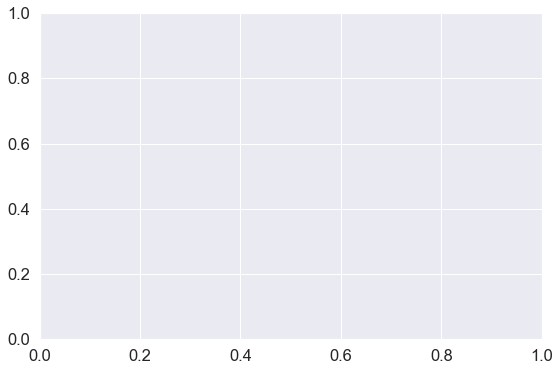

In [25]:
plt.figure(figsize=(9, 6))

plt.bar(range(4), 
        explained_variance, 
        alpha=0.5, 
        align='center',
        label='individual explained variance')

plt.step(range(4), 
         cum_explained_variance, 
         where='mid',
         color='g',
         label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

- The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. 

- The second principal component still bears some information (23.03%) 

- while the third and fourth principal components can safely be dropped without losing to much information. 

- Together, the first 2 principal components contain 95.8% of the information.

#### Projection Matrix

In [70]:
# It’s about time to get to the really interesting part: 

# The construction of the projection matrix that will be used to transform 
# the Iris data onto the new feature subspace. 

# basically just a matrix of the concatenated top k eigenvectors.

In [71]:
# Here, we are reducing the 4-dimensional feature space to a 2-dimensional 
# feature subspace, by choosing the “top 2” eigenvectors with the highest 
# eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [72]:
eig_pairs

[(2.9108180837520528,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9212209307072246,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1473532783050965,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020607707235625047,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [271]:
print(eig_pairs[0][1])
print(eig_pairs[1][1])
print(eig_pairs[2][1])
print(eig_pairs[3][1])

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]
[-0.72101681  0.24203288  0.14089226  0.6338014 ]
[ 0.26199559 -0.12413481 -0.80115427  0.52354627]


In [272]:
eig_pairs_save = eig_pairs

In [273]:
eig_pairs_save

[(2.9108180837520528,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9212209307072246,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1473532783050965,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020607707235625047,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [274]:
print(eig_pairs_save[0][1])
print(eig_pairs_save[1][1])

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]


In [275]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [276]:
# Projection Onto the New Feature Space

# use the 4×2-dimensional projection matrix W to transform our samples 
# onto the new subspace via the equation

In [277]:
# Y = X×W , where Y is a 150×2 matrix of our transformed samples.

# X = 150 x 4
# W = 4 x 2


In [278]:
Y = X_iris_std.dot(matrix_w)

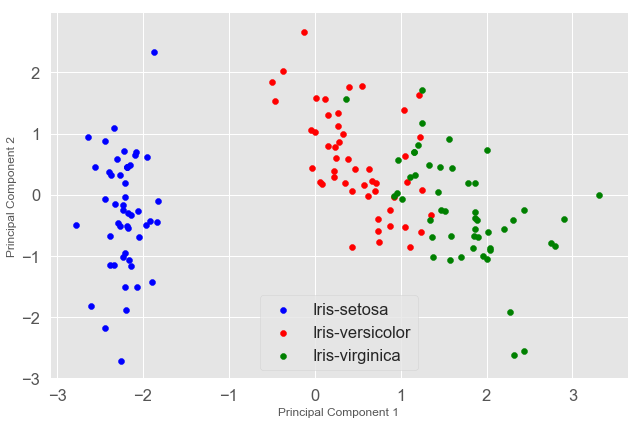

In [279]:
plt.figure(figsize=(9, 6))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('blue',        'red',             'green')):
    
    plt.scatter(Y[y_iris==lab, 0],
                Y[y_iris==lab, 1],
                label=lab,
                c=col)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()

#### PCA in scikit-learn
- For training/demo purposes, we went a long way to apply the PCA to the Iris dataset. 

- this is already implemented insci-kit learn. !!!

In [30]:
from mpl_toolkits.mplot3d import Axes3D

In [31]:
df.columns

Index(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'], dtype='object')

In [33]:
df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [35]:
class_nums = {"class": {"Iris-versicolor": 2, "Iris-virginica": 1, "Iris-setosa": 0}}
df.replace(class_nums, inplace=True)

In [36]:
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
# split data table into data X and class labels y

X = df.iloc[:, 0:3].values
y = df.iloc[:,   4].values

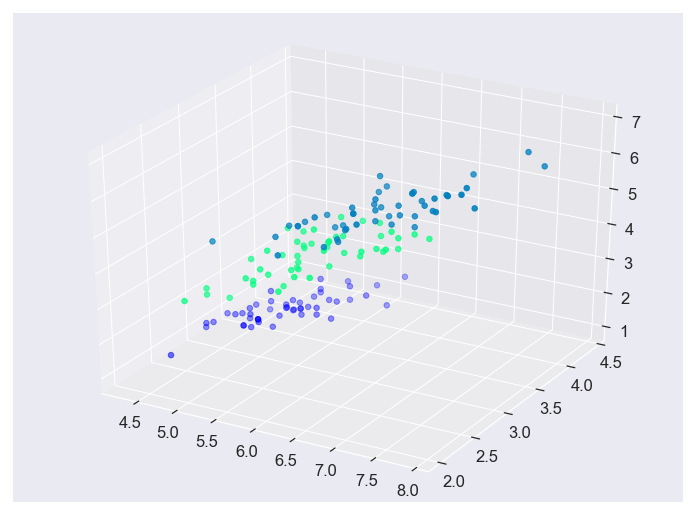

In [46]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ticks_font = matplotlib.font_manager.FontProperties(family='times new roman', 
                                                    style='normal', 
                                                    size=12, 
                                                    weight='normal', 
                                                    stretch='normal')

xs = X[:, 0]
ys = X[:, 1]
zs = X[:, 2]

ax.scatter(xs, ys, zs, s=30, c=y, marker='o', cmap='winter')  ;

In [47]:
sc = StandardScaler()  
X_std = sc.fit_transform(X)  

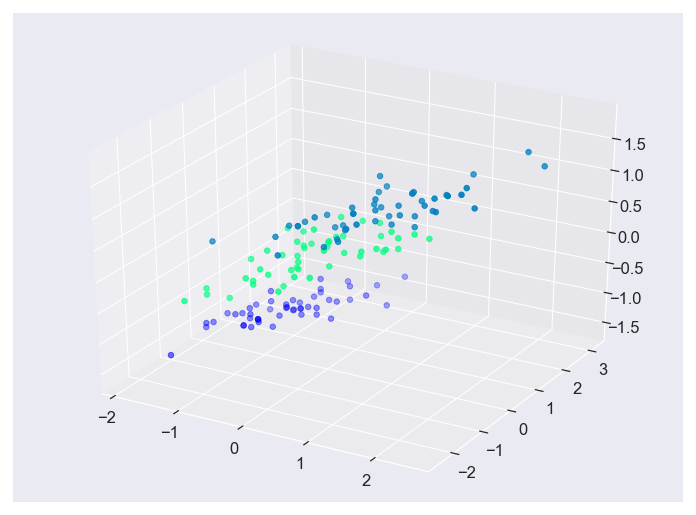

In [48]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ticks_font = matplotlib.font_manager.FontProperties(family='times new roman', 
                                                    style='normal', 
                                                    size=12, 
                                                    weight='normal', 
                                                    stretch='normal')

xs = X_std[:, 0]
ys = X_std[:, 1]
zs = X_std[:, 2]

ax.scatter(xs, ys, zs, s=30, c=y, marker='o', cmap='winter')  ;

In [122]:
# Applying PCA

In [68]:
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and 
# test sets.
pca3 = PCA(n_components=3)  

In [69]:
X_std_pca3 = pca3.fit_transform(X_std)  

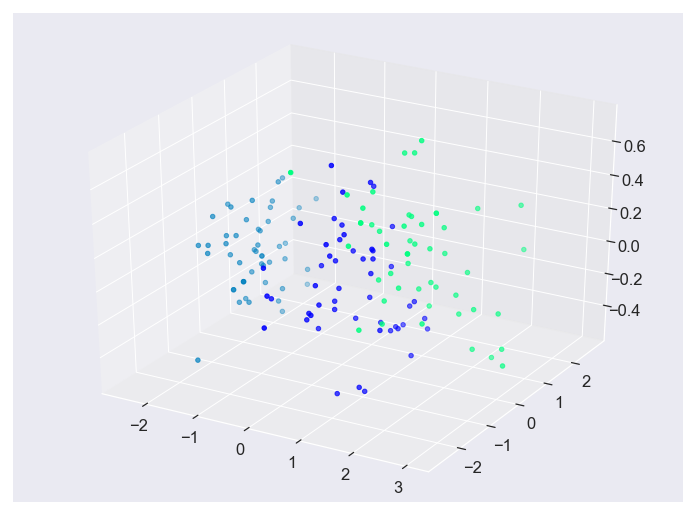

In [70]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# for name, label in [('Setosa', 0), ('Virginica', 2), ('Versicolour', 1)]:
#     ax.text3D(X_std_pca[y == label, 0].mean(),
#               X_std_pca[y == label, 1].mean() + 1.5,
#               X_std_pca[y == label, 2].mean(), name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
ax.scatter(X_std_pca3[:, 0], X_std_pca3[:, 1], X_std_pca3[:, 2], c=y, cmap='winter');

In [125]:
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the 
# principal components. 

In [285]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

In [127]:
# first principal component is responsible for 72.22% variance. 
# Similarly, the second principal component causes 23.9% variance in the dataset. 
# Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information 
# contained in the feature set is captured by the first two principal components.

#### Let's first try to use 1 principal component to train our algorithm. 

In [129]:
pca = PCA(n_components=1)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

In [130]:
# Training and Making Predictions

In [131]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [132]:
cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy :  0.9333333333333333


In [133]:
# It can be seen from the output that with only one feature, the random forest algorithm is 
# able to correctly predict 28 out of 30 instances, 
# resulting in 93.33% accuracy.

#### Results with 2 and 3 Principal Components

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [135]:
pca = PCA(n_components=2)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

In [136]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 10  3]
 [ 0  2  4]]
Accuracy :  0.8333333333333334


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 With 2 principal components the classification accuracy decreases to 83.33% compared to 
 93.33% for 1 component.

#### with 3 PC

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

pca = PCA(n_components=3)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy :  0.9333333333333333


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

pca = PCA(n_components=4)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]
Accuracy :  0.8666666666666667


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
